In [1]:
from glob import glob
import os, re

import matplotlib.pyplot as plt
import numpy as np
import ROOT as rt
import root_numpy as rtnp
from histo_utilities import create_TH1D

from cebefo_style import cebefo_style
cebefo_style()

Welcome to JupyROOT 6.10/08


In [2]:
hlf_features = ['HT', 'METp', 'METo', 'MT', 'nJets', 
                'bJets', 'allJetMass', 'LepPt', 'LepEta', 
                'LepIsoCh', 'LepIsoGamma', 'LepIsoNeu', 'LepCharge', 
                'LepIsEle', 'nMu', 'allMuMass', 'allMuPt', 'nEle', 
                'allEleMass', 'allElePt', 'nChHad', 'nNeuHad', 'nPhoton']

active_hlf_features = ['HT', 'allJetMass',
                       'allMuPt', 'allMuMass',
                       'allElePt','allEleMass',
                       'LepPt', 'LepIsoCh', 'LepIsoGamma', 'LepIsoNeu',
                       
                       'METp', 'METo',
                       
                       'MT',
                       
                       'nMu', 'nJets', 'bJets', 'nEle', 
                       
                       'LepCharge','LepIsEle', 
                       
                       'nChHad', 'nNeuHad']

sel = []
for a in active_hlf_features:
    for i,f in enumerate(hlf_features):
        if a == f:
            sel.append(i)

x_axis_label = [ 'S_{T} [GeV]', 'Jets Mass [GeV]',
                'Muons P_{T} [GeV]', 'Muons Mass [GeV]',
                'Electrons P_{T} [GeV]', 'Electrons Mass [GeV]',
                'Lep P_{T} [GeV]', 'ChPFIso', 'GammaPFIso', 'NeuPFIso',
                
#                 'METp [GeV]', 'METo [GeV]',
                'p_{T #parallel}^{miss}', 'p_{T #perp}^{miss}',
                
                'M_{T} [GeV]',
                
                'Muons number', 'Jets number', 'b-tagged jets number', 'Electrons number',
                
                'Lep Charge [e]','IsEle',
                
                'Charged Had number', 'Neutral Had number']

sel = []
for a in active_hlf_features:
    for i,f in enumerate(hlf_features):
        if a == f:
            sel.append(i)

In [3]:
len(active_hlf_features)

21

In [5]:
# folder = '../data/HLF_ONLY/'
# datasets = glob(folder+'*.npy')

# dataset_path = {}
# for path in datasets:
#     n = os.path.basename(path)
#     aux = re.search(r'[a-zA-Z0-9]+_', n)
#     name = aux.group(0)[:-1]
#     print name, ' ---> ', path
#     dataset_path[name] = path

In [21]:
dataset_path = {}

# dataset_path['qcd_HLFONLY'] = '../data/HLF_ONLY/qcd_separate/qcd_lepFilter_13TeV_HLFONLY_7785.npy'
# dataset_path['qcd'] = '../data/HLF_ONLY/qcd_separate/qcd_3645.npy'

dataset_path['qcd_lepFilter_new'] = '../data/HLF_ONLY/qcd_separate/qcd_lepFilter_13TeV_13921.npy'
# dataset_path['qcd_lepFilter_old'] = '../data/HLF_ONLY/qcd_separate_old/qcd_lepFilter_13TeV_13920.npy'
# # dataset_path['Wlnu'] = '../data/HLF_ONLY/Wlnu_lepFilter_13TeV_sample.npy'

# dataset_path['Ato4l'] = '../data/HLF_ONLY/Ato4l_lepFilter_13TeV_sample.npy'
# dataset_path['Ato4l_EXTRA'] = '../data/HLF_ONLY/Ato4l_lepFilter_13TeV_EXTRA_sample.npy'

# dataset_path['LQ'] = '../data/HLF_ONLY/leptoquark_LOWMASS_lepFilter_13TeV_EXTRA_sample.npy'
# dataset_path['LQ_EXTRA'] = '../data/HLF_ONLY/leptoquark_lepFilter_13TeV_sample.npy'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out
Info in <TCanvas::Print>: png file /Users/olmo/Desktop/qcd.png has been created


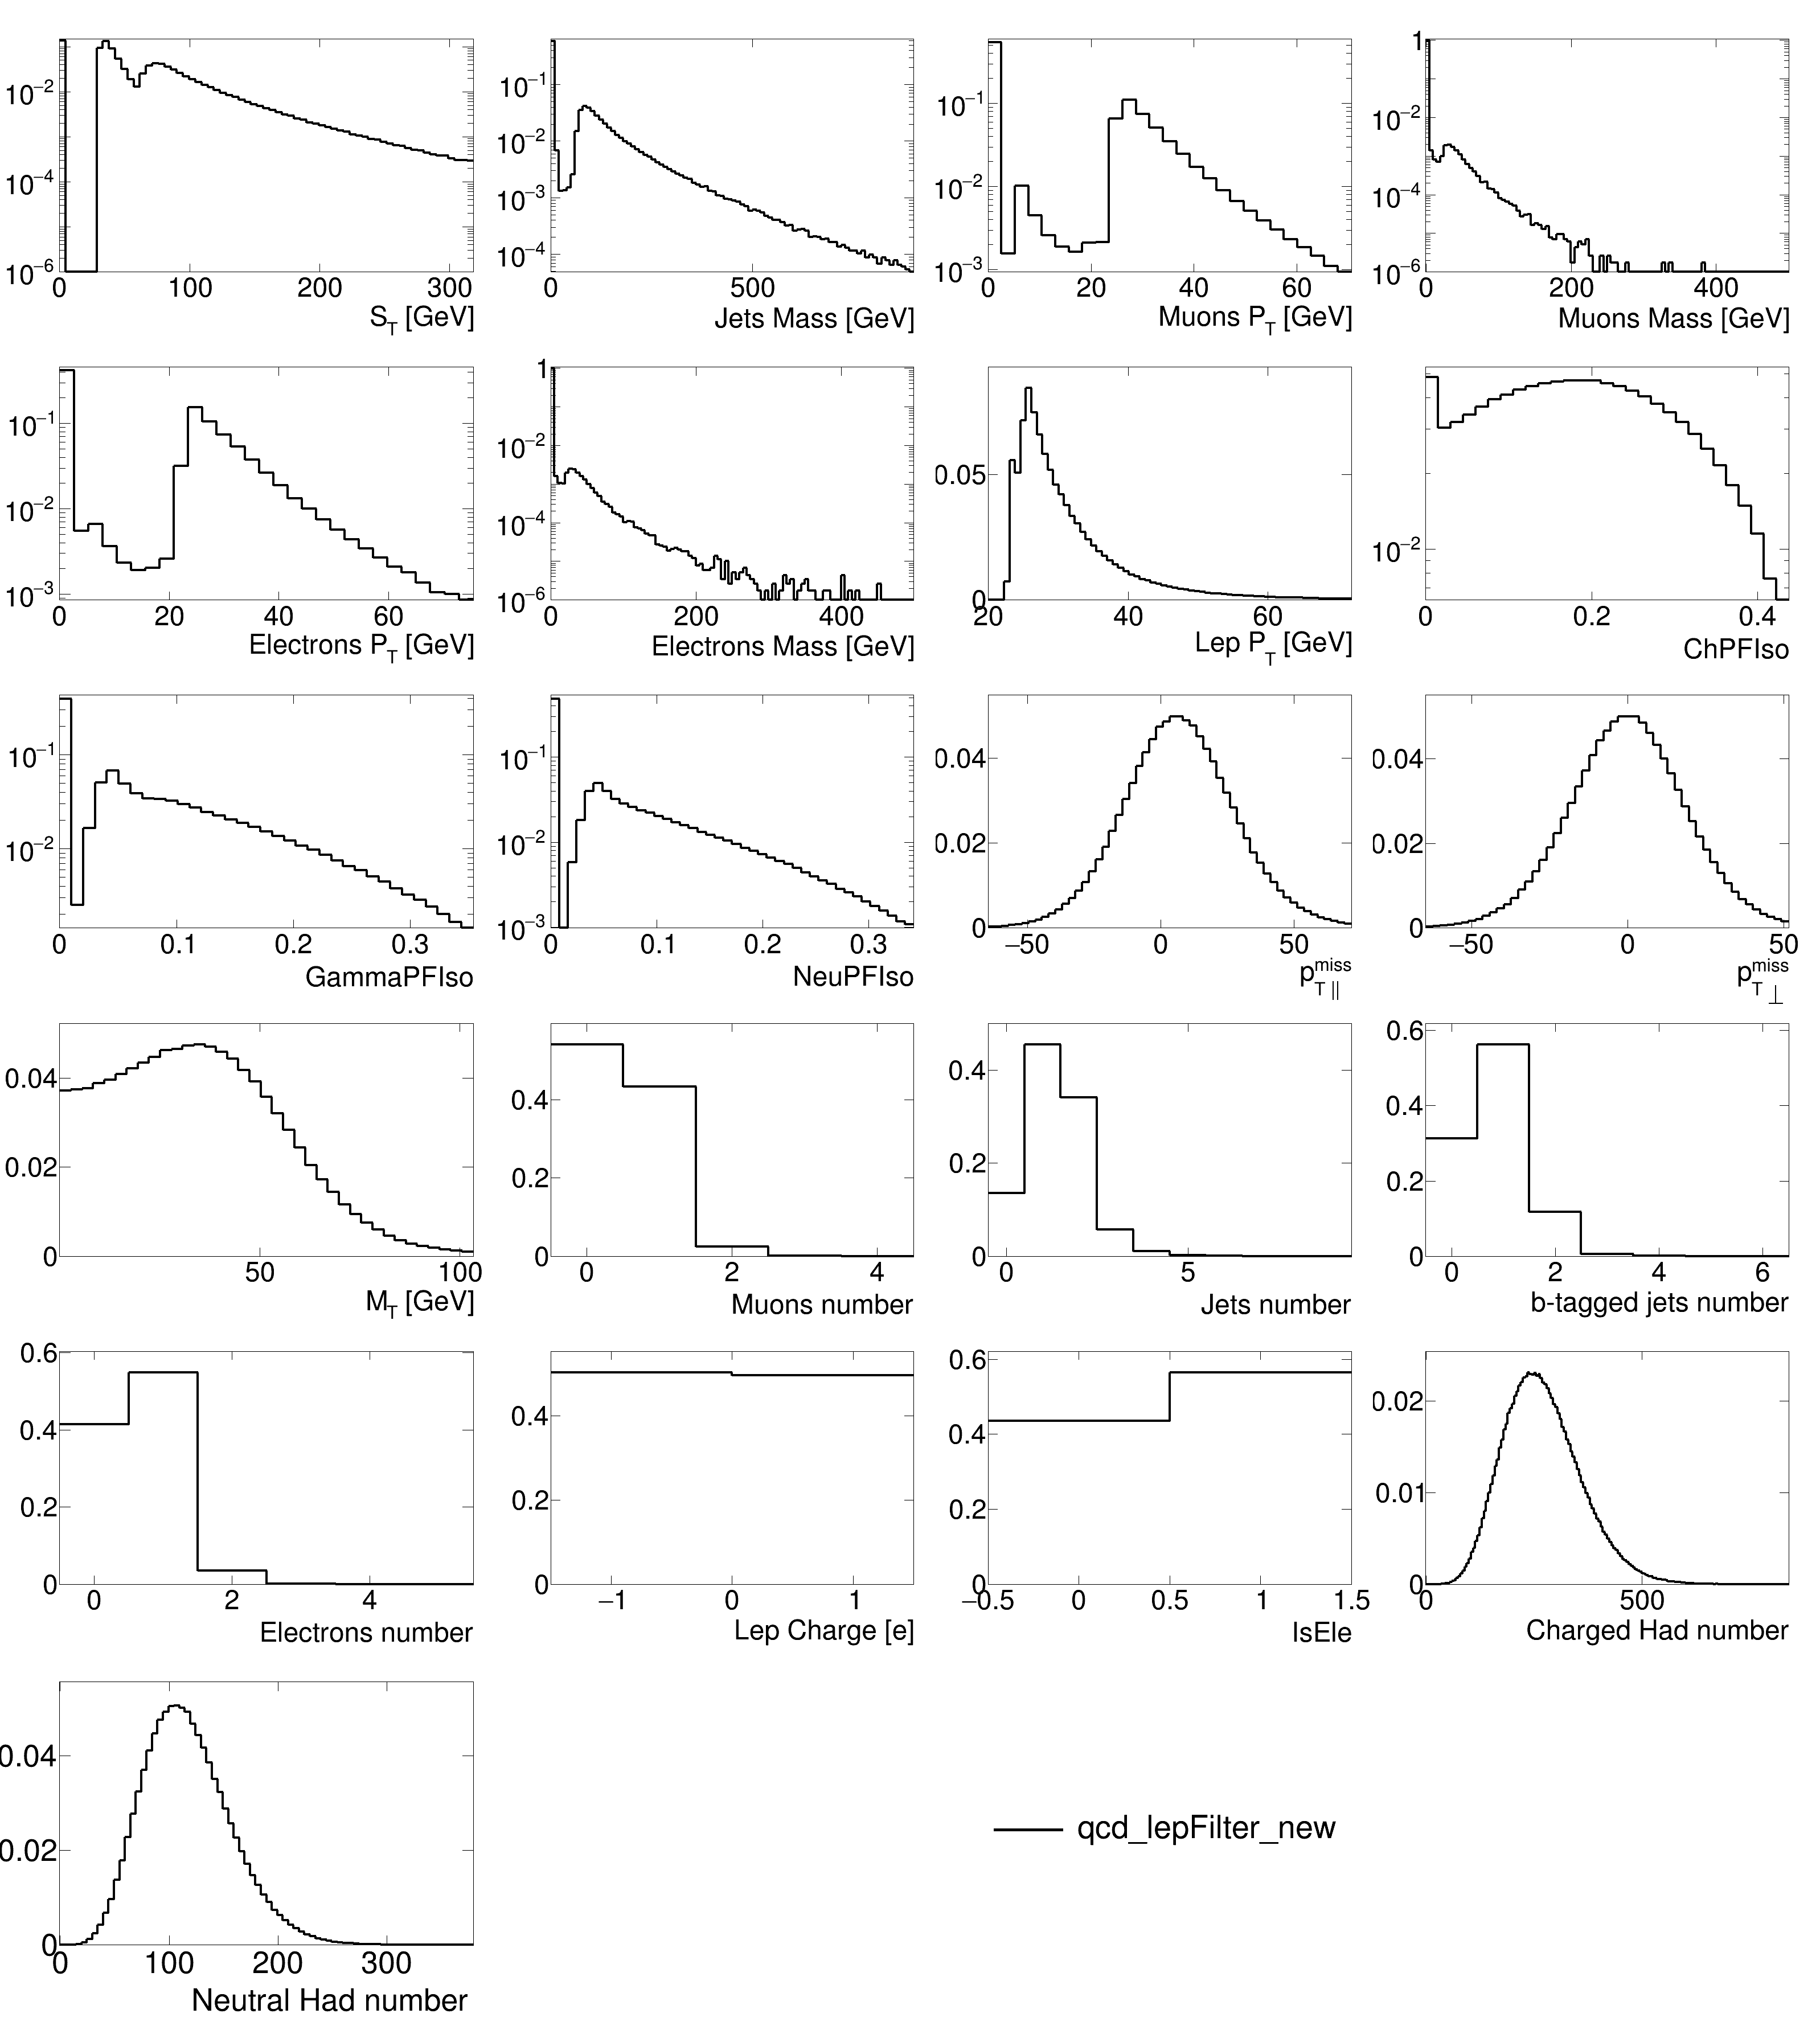

In [22]:
dnd = []

c = rt.TCanvas('c_out', 'c_out', 3200, 3600)
c.Divide(4,6, 0., 0.005)

colors = [1,2,4,8,46, 30, 40]

binning_list = []

max_prob_hlf = np.zeros(len(active_hlf_features))

leg = rt.TLegend(0.1, 0.1, 1, 1)
# leg.SetNColumns(2)
leg.SetLineWidth(0)

# for DS in dataset_path.keys():
# DS_name = ['W', 'QCD', 'Z', 't#bar{t}']
# for j, DS in enumerate(['Wlnu', 'qcd', 'Zll', 'ttbar']):

# DS_name = ['a #rightarrow 4l', "W'", "Z'", 'LQ']
# for j, DS in enumerate(['Ato4l', 'Wprime', 'Zprime', 'leptoquark']):    


DS_name = dataset_path.keys()
for j, DS in enumerate(dataset_path.keys()):    

    arr = np.load(dataset_path[DS])[:, sel]
    for i, nhlf in enumerate(active_hlf_features):
        a = arr[:, i]
        
        tag = '_{}_{}'.format(DS, nhlf)
#         print tag
        
        if j==0:
            if nhlf == 'allJetMass':
                binning = [90, 0, 900]
            elif nhlf in ['nChHad', 'nNeuHad']:
                up = int(np.max(a) - int(np.max(a))%5 -1)
                binning = [(up+1)/5, -0.5, up+0.5]
            elif nhlf in ['nMu', 'nEle', 'nJets', 'bJets']:
                length = np.max(a) - np.min(a) + 1
                binning = [int(length), np.min(a)-0.5, np.max(a)+0.5]
            elif nhlf in ['LepIsEle', 'LepCharge']:
                binning = [2, np.min(a)-0.5, np.max(a)+0.5]
            elif nhlf in ['allEleMass', 'allMuMass']:
                binning = [100, -0.5, 500.]  
            elif nhlf == 'LepPt':
                bin_w = 10*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
                if bin_w == 0:
                    bin_w = np.std(a)/5
                binning = [None, 20, np.percentile(a, 99.)]
                binning[0] = int((binning[2] - binning[1])/bin_w) + 2
            else:
                bin_w = 10*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
                if bin_w == 0:
                    bin_w = np.std(a)/5
                binning = [None, np.percentile(a, .1), np.percentile(a, 99.5)]
                binning[0] = int((binning[2] - binning[1])/bin_w) + 2
            binning_list.append(binning)

        h = create_TH1D(a, 'h'+tag, '', binning=binning_list[i])
        h.SetLineWidth(4)
        h.SetXTitle(x_axis_label[i])
#         h.SetYTitle('Probability')
        h.GetXaxis().SetTitleOffset(1.02)
    
        h.GetXaxis().SetTitleSize(0.09)
        h.GetXaxis().SetLabelSize(0.09)
        h.GetYaxis().SetLabelSize(0.09)
        
        h.GetYaxis().SetNdivisions(4,0,0)
        h.GetXaxis().SetNdivisions(4,0,0)
    
        h.Scale(1./h.GetEntries())
        max_prob_hlf[i] = max(max_prob_hlf[i], h.GetMaximum())
        
        h.SetStats(0)
        h.SetLineColor(colors[j])

        opt = ''
        if j != 0:
            opt += 'SAME'
        pad = c.cd(i+1)
        h.Sumw2(0)
        h.Draw(''+opt)

        if j==0:
            pad.SetGrid(0,0)
            pad.SetTopMargin(0.05)
            pad.SetBottomMargin(0.24)
            pad.SetRightMargin(0.05)            
            pad.SetLeftMargin(0.12)            
            if nhlf.startswith('LepIso') or nhlf.startswith('all') or nhlf=='HT':
                pad.SetLogy()
            else:
                h.GetYaxis().SetRangeUser(0, h.GetMaximum()*1.1)
            
        dnd.append(h)
    l = rt.TLine()
    l.SetLineWidth(5)
    l.SetLineColor(colors[j])
    leg.AddEntry(l, DS_name[j], 'l')
    dnd.append(l)
        
for i in range(len(active_hlf_features)):
    dnd[i].GetYaxis().SetRangeUser(1e-6+dnd[i].GetMinimum(), 1.1*max_prob_hlf[i])
    
c.cd(23)
# h = rt.TH1F('hvoid','hvoid',1,0,1)
# h.Draw('SAME')
leg.Draw()

c.Update()
c.Draw()
# c.SaveAs('../fig/paper_fig/BSM_HLF_Summary.root')
# c.SaveAs('../fig/paper_fig/BSM_HLF_Summary.png')
#         c.SaveAs('../../www/DatasetCheck/{}_{}.png'.format(nhlf, DS))

c.SaveAs('~/Desktop/qcd.png')
dnd.append(c)

In [23]:
dnd = []

c = rt.TCanvas('c_out', 'c_out', 3200, 3600)
c.Divide(4,6, 0., 0.005)

colors = [1,2,4,8,46, 30, 40]

binning_list = []

max_prob_hlf = np.zeros(len(active_hlf_features))

leg = rt.TLegend(0.1, 0.1, 1, 1)
# leg.SetNColumns(2)
leg.SetLineWidth(0)

DS_name = []
arr = np.load(dataset_path['Wlnu'])[:, sel]
vv = np.linspace(0, arr.shape[0],4)

for j, idx in enumerate(np.column_stack((vv[:-1], vv[1:]))):
    print idx
    DS = 'sect_{}'.format(j)
    DS_name.append(DS)
    for i, nhlf in enumerate(active_hlf_features):
        a = arr[int(idx[0]):int(idx[1]), i]
        
        tag = '_{}_{}'.format(DS, nhlf)
#         print tag
        
        if j==0:
            if nhlf == 'allJetMass':
                binning = [90, 0, 900]
            elif nhlf in ['nChHad', 'nNeuHad']:
                up = int(np.max(a) - int(np.max(a))%5 -1)
                binning = [(up+1)/5, -0.5, up+0.5]
            elif nhlf in ['nMu', 'nEle', 'nJets', 'bJets']:
                length = np.max(a) - np.min(a) + 1
                binning = [int(length), np.min(a)-0.5, np.max(a)+0.5]
            elif nhlf in ['LepIsEle', 'LepCharge']:
                binning = [2, np.min(a)-0.5, np.max(a)+0.5]
            elif nhlf in ['allEleMass', 'allMuMass']:
                binning = [100, -0.5, 500.]  
            elif nhlf == 'LepPt':
                bin_w = 10*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
                if bin_w == 0:
                    bin_w = np.std(a)/5
                binning = [None, 20, np.percentile(a, 99.)]
                binning[0] = int((binning[2] - binning[1])/bin_w) + 2
            else:
                bin_w = 10*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
                if bin_w == 0:
                    bin_w = np.std(a)/5
                binning = [None, np.percentile(a, .1), np.percentile(a, 99.5)]
                binning[0] = int((binning[2] - binning[1])/bin_w) + 2
            binning_list.append(binning)

        h = create_TH1D(a, 'h'+tag, '', binning=binning_list[i])
        h.SetLineWidth(4)
        h.SetXTitle(x_axis_label[i])
#         h.SetYTitle('Probability')
        h.GetXaxis().SetTitleOffset(1.02)
    
        h.GetXaxis().SetTitleSize(0.09)
        h.GetXaxis().SetLabelSize(0.09)
        h.GetYaxis().SetLabelSize(0.09)
        
        h.GetYaxis().SetNdivisions(4,0,0)
        h.GetXaxis().SetNdivisions(4,0,0)
    
        h.Scale(1./h.GetEntries())
        max_prob_hlf[i] = max(max_prob_hlf[i], h.GetMaximum())
        
        h.SetStats(0)
        h.SetLineColor(colors[j])

        opt = ''
        if j != 0:
            opt += 'SAME'
        pad = c.cd(i+1)
        h.Sumw2(0)
        h.Draw(''+opt)

        if j==0:
            pad.SetGrid(0,0)
            pad.SetTopMargin(0.05)
            pad.SetBottomMargin(0.24)
            pad.SetRightMargin(0.05)            
            pad.SetLeftMargin(0.12)            
            if nhlf.startswith('LepIso') or nhlf.startswith('all') or nhlf=='HT':
                pad.SetLogy()
            else:
                h.GetYaxis().SetRangeUser(0, h.GetMaximum()*1.1)
            
        dnd.append(h)
    l = rt.TLine()
    l.SetLineWidth(5)
    l.SetLineColor(colors[j])
    leg.AddEntry(l, DS_name[j], 'l')
    dnd.append(l)
        
for i in range(len(active_hlf_features)):
    dnd[i].GetYaxis().SetRangeUser(1e-6+dnd[i].GetMinimum(), 1.1*max_prob_hlf[i])
    
c.cd(23)
# h = rt.TH1F('hvoid','hvoid',1,0,1)
# h.Draw('SAME')
leg.Draw()

c.Update()
c.Draw()
# c.SaveAs('../fig/paper_fig/BSM_HLF_Summary.root')
# c.SaveAs('../fig/paper_fig/BSM_HLF_Summary.png')
#         c.SaveAs('../../www/DatasetCheck/{}_{}.png'.format(nhlf, DS))

c.SaveAs('~/Desktop/Wlnu.png')
dnd.append(c)

KeyError: 'Wlnu'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out


In [ ]:
dataset_path.keys()

In [ ]:
dataset_path.keys()